In [2]:
import csv
import numpy as np
import math

def calcular_distancia_centro_para_borda(x_centro, y_centro, cell_width, cell_height, x_pred, y_pred):
    # Calcula o centro da célula do grid

    # Calcula os limites do retângulo (célula do grid)
    x_min = x_centro - cell_width//2
    x_max = x_centro + cell_width//2
    y_min = y_centro - cell_height//2
    y_max = y_centro + cell_height//2

    #print("X, Y" , x_centro, y_centro)
#    print()
#    print("XMIN E XMAX = ", x_min, x_max)
#    print("YMIN E YMAX = ", y_min, y_max)

    # Calcula a distância do ponto predito até a borda mais próxima da célula
    distancia = distancia_ponto_retangulo(x_pred, y_pred, x_min, y_min, x_max, y_max)

    return distancia


# Suas funções originais (mantidas como estão)
def calcular_posicao_grid(row, col, cell_width, cell_height):
    x = col * cell_width + cell_width // 2
    y = row * cell_height + cell_height // 2
    return x, y


def distancia_ponto_retangulo(xp, yp, xmin, ymin, xmax, ymax):
    # Se o ponto está dentro do retângulo, a distância é 0
    #print()
    #print("XMIN E XMAX = ", xmin, xmax)
    #print("YMIN E YMAX = ", ymin, ymax)
    #print("XP: ", xp)
    #print("YP: ", yp)

    if xmin <= xp <= xmax and ymin <= yp <= ymax:
        return 0

    # Calcula a menor distância para os lados do retângulo
    dx = max(xmin - xp, 0, xp - xmax)
    dy = max(ymin - yp, 0, yp - ymax)

    return math.sqrt(dx ** 2 + dy ** 2)

def load_and_convert_csv(file_path):
    data = []
    with open(file_path, newline='') as f:
        reader = csv.reader(f)
        for row in reader:
            # Converte cada valor na linha para float
            try:
                converted_row = [float(value) for value in row]
                data.append(converted_row)
            except ValueError as e:
                print(f"Aviso: Não foi possível converter a linha {row}: {e}")
                continue
    return np.array(data)        

file_path = 'calib_10xPonto/calib11/teste_4points_allPreds13x21p-pt1.csv'
data = load_and_convert_csv(file_path)
print(data)

[[   0.            0.            0.        ]
 [  11.54137458    0.            0.        ]
 [  25.59132099    0.            0.        ]
 ...
 [1908.41153074 1080.          135.        ]
 [1920.         1080.          136.        ]
 [1920.         1080.          136.        ]]


In [ ]:
"""ROWS, COLS = 13, 21
WIDTH, HEIGHT = 1920, 1080
CELL_WIDTH = WIDTH // COLS
CELL_HEIGHT = HEIGHT // ROWS

#13x21
positions = [
    (45, 41), (227, 41), (409, 41), (591, 41), (773, 41), (955, 41), (1137, 41), (1319, 41), (1501, 41), (1683, 41), (1865, 41),
    (136, 124), (318, 124), (500, 124), (682, 124), (864, 124), (1046, 124), (1228, 124), (1410, 124), (1592, 124), (1774, 124),
    (45, 207), (227, 207), (409, 207), (591, 207), (773, 207), (955, 207), (1137, 207), (1319, 207), (1501, 207), (1683, 207), (1865, 207),
    (136, 290), (318, 290), (500, 290), (682, 290), (864, 290), (1046, 290), (1228, 290), (1410, 290), (1592, 290), (1774, 290),
    (45, 373), (227, 373), (409, 373), (591, 373), (773, 373), (955, 373), (1137, 373), (1319, 373), (1501, 373), (1683, 373), (1865, 373),
    (136, 456), (318, 456), (500, 456), (682, 456), (864, 456), (1046, 456), (1228, 456), (1410, 456), (1592, 456), (1774, 456),
    (45, 539), (227, 539), (409, 539), (591, 539), (773, 539), (955, 539), (1137, 539), (1319, 539), (1501, 539), (1683, 539), (1865, 539),
    (136, 622), (318, 622), (500, 622), (682, 622), (864, 622), (1046, 622), (1228, 622), (1410, 622), (1592, 622), (1774, 622),
    (45, 705), (227, 705), (409, 705), (591, 705), (773, 705), (955, 705), (1137, 705), (1319, 705), (1501, 705), (1683, 705), (1865, 705),
    (136, 788), (318, 788), (500, 788), (682, 788), (864, 788), (1046, 788), (1228, 788), (1410, 788), (1592, 788), (1774, 788),
    (45, 871), (227, 871), (409, 871), (591, 871), (773, 871), (955, 871), (1137, 871), (1319, 871), (1501, 871), (1683, 871), (1865, 871),
    (136, 954), (318, 954), (500, 954), (682, 954), (864, 954), (1046, 954), (1228, 954), (1410, 954), (1592, 954), (1774, 954),
    (45, 1037), (227, 1037), (409, 1037), (591, 1037), (773, 1037), (955, 1037), (1137, 1037), (1319, 1037), (1501, 1037), (1683, 1037), (1865, 1037)
]

positions = [
    (106, 49),  (532, 49), (958, 49), (1384, 49), (1810, 49),
    (319, 147), (745, 147), (1171, 147), (1597, 147),
    (106, 245), (532, 245), (958, 245), (1384, 245), (1810, 245),
    (319, 343), (745, 343), (1171, 343), (1597, 343),
    (106, 441), (532, 441), (958, 441), (1384, 441), (1810, 441),
    (319, 539), (745, 539), (1171, 539), (1597, 539),
    (106, 637), (532, 637), (958, 637), (1384, 637), (1810, 637),
    (319, 735), (745, 735), (1171, 735), (1597, 735),
    (106, 833), (532, 833), (958, 833), (1384, 833), (1810, 833),
    (319, 931), (745, 931), (1171, 931), (1597, 931),
    (106, 1029), (532, 1029), (958, 1029), (1384, 1029), (1810, 1029)
]
#13x11
positions = [
    (87, 41), (435, 41), (783, 41), (1131, 41), (1479, 41), (1827, 41),
    (261, 124), (609, 124), (957, 124), (1305, 124), (1653, 124),
    (87, 207), (435, 207), (783, 207), (1131, 207), (1479, 207), (1827, 207),
    (261, 290), (609, 290), (957, 290), (1305, 290), (1653, 290),
    (87, 373), (435, 373), (783, 373), (1131, 373), (1479, 373), (1827, 373),
    (261, 456), (609, 456), (957, 456), (1305, 456), (1653, 456),
    (87, 539), (435, 539), (783, 539), (1131, 539), (1479, 539), (1827, 539),
    (261, 622), (609, 622), (957, 622), (1305, 622), (1653, 622),
    (87, 705), (435, 705), (783, 705), (1131, 705), (1479, 705), (1827, 705),
    (261, 788), (609, 788), (957, 788), (1305, 788), (1653, 788),
    (87, 871), (435, 871), (783, 871), (1131, 871), (1479, 871), (1827, 871),
    (261, 954), (609, 954), (957, 954), (1305, 954), (1653, 954),
    (87, 1037), (435, 1037), (783, 1037), (1131, 1037), (1479, 1037), (1827, 1037)
]

positions = [
    (192, 108),
    (960, 108),
    (1728, 108),
    (576, 324),
    (1344, 324),
    (192, 540),
    (960, 540),
    (1728, 540),
    (576, 756),
    (1344, 756),
    (192, 972),
    (960, 972),
    (1728, 972),
]


positions = [
    (192, 108),
    (960, 77),
    (1728, 77),
    (576, 231),
    (1344, 231),
    (192, 385),
    (960, 385),
    (1728, 385),
    (576, 539),
    (1344, 539),
    (192, 693),
    (960, 693),
    (1728, 693),
    (576, 847),
    (1344, 847),
    (192, 1001),
    (960, 1001),
    (1728, 1001)
]



#7x7
positions = [
    (137, 77),    (685, 77),    (1233, 77),   (1781, 77),
    (411, 231),   (959, 231),   (1507, 231),
    (137, 385),   (685, 385),   (1233, 385),  (1781, 385),
    (411, 539),   (959, 539),   (1507, 539),
    (137, 693),   (685, 693),   (1233, 693),  (1781, 693),
    (411, 847),   (959, 847),   (1507, 847),
    (137, 1001),  (685, 1001),  (1233, 1001), (1781, 1001)
]



#11x9
positions = [
    (106, 49),  (532, 49), (958, 49), (1384, 49), (1810, 49),
    (319, 147), (745, 147), (1171, 147), (1597, 147),
    (106, 245), (532, 245), (958, 245), (1384, 245), (1810, 245),
    (319, 343), (745, 343), (1171, 343), (1597, 343),
    (106, 441), (532, 441), (958, 441), (1384, 441), (1810, 441),
    (319, 539), (745, 539), (1171, 539), (1597, 539),
    (106, 637), (532, 637), (958, 637), (1384, 637), (1810, 637),
    (319, 735), (745, 735), (1171, 735), (1597, 735),
    (106, 833), (532, 833), (958, 833), (1384, 833), (1810, 833),
    (319, 931), (745, 931), (1171, 931), (1597, 931),
    (106, 1029), (532, 1029), (958, 1029), (1384, 1029), (1810, 1029)
]

get_positions = lambda data: ( [row[0] for row in data], [row[1] for row in data] )
pos_x, pos_y = get_positions(data)"""

In [3]:
WIDTH, HEIGHT = 1920, 1080

shape_coletado = [(13,21)]
pos_coletado = []
for s in shape_coletado:
    width = WIDTH // s[1]
    height = HEIGHT // s[0]
    for x in range(0, s[0]): #linha
        if x % 2 == 0:
            for y in range(0, s[1], 2): #coluna
                pos_coletado.append(calcular_posicao_grid(x, y, width, height))
        else:
            for y in range(1, s[1], 2): #coluna
                pos_coletado.append(calcular_posicao_grid(x, y, width, height))

print(pos_coletado)
print(len(pos_coletado))

[(45, 41), (227, 41), (409, 41), (591, 41), (773, 41), (955, 41), (1137, 41), (1319, 41), (1501, 41), (1683, 41), (1865, 41), (136, 124), (318, 124), (500, 124), (682, 124), (864, 124), (1046, 124), (1228, 124), (1410, 124), (1592, 124), (1774, 124), (45, 207), (227, 207), (409, 207), (591, 207), (773, 207), (955, 207), (1137, 207), (1319, 207), (1501, 207), (1683, 207), (1865, 207), (136, 290), (318, 290), (500, 290), (682, 290), (864, 290), (1046, 290), (1228, 290), (1410, 290), (1592, 290), (1774, 290), (45, 373), (227, 373), (409, 373), (591, 373), (773, 373), (955, 373), (1137, 373), (1319, 373), (1501, 373), (1683, 373), (1865, 373), (136, 456), (318, 456), (500, 456), (682, 456), (864, 456), (1046, 456), (1228, 456), (1410, 456), (1592, 456), (1774, 456), (45, 539), (227, 539), (409, 539), (591, 539), (773, 539), (955, 539), (1137, 539), (1319, 539), (1501, 539), (1683, 539), (1865, 539), (136, 622), (318, 622), (500, 622), (682, 622), (864, 622), (1046, 622), (1228, 622), (1410

In [4]:
CELL_WIDTH = 1920 // 3
CELL_HEIGHT = 1080 // 3

CELL_BORDER_X = CELL_WIDTH // 2
CELL_BORDER_Y = CELL_HEIGHT // 2

indice = 0

label = []
label_coletado = []
tt_shape = [(3,3)]

for i in range(tt_shape[0][0] * tt_shape[0][1]):
    label.append([])

for i in range(len(pos_coletado) + 1):
    label_coletado.append([])


for d in data:
    label_coletado[int(d[2])].append( (float(d[0]), float(d[1])) )
    
'''print(label)
print(len(label))

print(label_coletado)
print(len(label_coletado))'''



'print(label)\nprint(len(label))\n\nprint(label_coletado)\nprint(len(label_coletado))'

In [43]:
shapes = [(2,2), (3,3), (4,4), (5, 8), (6, 10), (7, 12), (9, 14), (10, 16), (11, 18), (13, 21)]
to_save = []
save_aux = []
grid_threshold = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
dicionario_threshold = {valor: [] for valor in grid_threshold}

for s in range(len(shapes)):
    CELL_WIDTH = 1920 // shapes[s][1]
    CELL_HEIGHT = 1080 // shapes[s][0]
    CELL_BORDER_X = CELL_WIDTH // 2
    CELL_BORDER_Y = CELL_HEIGHT // 2

    indice = 0

    threshold_result = []
    label = []
    predictions = []
    positions = []
    
    flag_out = []
    dist_pred_quant = []
    dist_pred_noQuant = []
    preds_noQuant = 0
    flag_aux = 0
    preds_quant = 0

    for i in range(len(threshold_result)):
        threshold_result.append(0)

    for x in range(shapes[s][0]): #linha
            for y in range(shapes[s][1]): #coluna
                positions.append(calcular_posicao_grid(x, y, CELL_WIDTH, CELL_HEIGHT))
    #print(positions)
        
    for i in positions:
        for d in data:
            #print(d)
            if pos_coletado[int(d[2])][0] >= i[0] - CELL_BORDER_X and pos_coletado[int(d[2])][0] <= i[0] + CELL_BORDER_X and pos_coletado[int(d[2])][1] >= i[1] - CELL_BORDER_Y and pos_coletado[int(d[2])][1] <= i[1] + CELL_BORDER_Y:
                label.append( [float(d[0]), float(d[1]), indice])
                #print("ok")
            #print()
        indice+=1

    for l in label:
        flag_out.clear()
        x_min = positions[int(l[2])][0] - CELL_WIDTH//2
        x_max = positions[int(l[2])][0] + CELL_WIDTH//2
        y_min = positions[int(l[2])][1] - CELL_HEIGHT//2
        y_max = positions[int(l[2])][1] + CELL_HEIGHT//2

        for i in range(len(positions)):
            flag_out.append(0)

        if np.sum(flag_out) == 0:
            flag_out[l[2]] = 1
            flag_aux = l[2]

        for t in range(len(grid_threshold)):
            if l[0] >= x_min and l[0] <= x_max and l[1] >= y_min and l[1] <= y_max or flag_out[flag_aux] == 1:
                if l[0] <= x_min - grid_threshold[t] or l[0] >= x_max + grid_threshold[t] or l[1] <= y_min - grid_threshold[t] or l[1] >= y_max + grid_threshold[t]:
                    #dist_pred_quant.append( (calcular_distancia_centro_para_borda(positions[l[2]][0], positions[l[2]][1], CELL_WIDTH, CELL_HEIGHT, l[0], l[1]), l[2]) )
                    dicionario_threshold[grid_threshold[t]].append( calcular_distancia_centro_para_borda(positions[l[2]][0], positions[l[2]][1], CELL_WIDTH, CELL_HEIGHT, l[0], l[1]) )
                    flag_out[flag_aux] = 0
                    flag_aux = l[2]
                    flag_out[l[2]] = 1
                else:
                    #dist_pred_quant.append( (0, l[2]) )
                    dicionario_threshold[grid_threshold[t]].append( 0 )
                    preds_quant += 1
            else:
                #dist_pred_quant.append( (calcular_distancia_centro_para_borda(positions[l[2]][0], positions[l[2]][1], CELL_WIDTH, CELL_HEIGHT, l[0], l[1]), grid_threshold[t]))
                dicionario_threshold[grid_threshold[t]].append( calcular_distancia_centro_para_borda(positions[l[2]][0], positions[l[2]][1], CELL_WIDTH, CELL_HEIGHT, l[0], l[1]) )
                


        if l[0] >= x_min and l[0] <= x_max and l[1] >= y_min and l[1] <= y_max:
            dist_pred_noQuant.append( (0, int(l[2])) )
            preds_noQuant += 1
        else:
            dist_pred_noQuant.append( calcular_distancia_centro_para_borda(positions[l[2]][0], positions[l[2]][1], CELL_WIDTH, CELL_HEIGHT, l[0], l[1]) )


    cabecalho = dicionario_threshold.keys()
    linhas = zip(*dicionario_threshold.values())

    with open(f"calib_10xPonto/calib11/results/test_tResult_GridShape{shapes[s][0]}x{shapes[s][1]}.csv", mode='w', newline='', encoding='utf-8') as arquivo:
        writer = csv.writer(arquivo)
        writer.writerow(cabecalho)  # Escreve o cabeçalho
        writer.writerows(linhas)    # Escreve as linhas


'''    dist_quant = sum(a for a, _ in dist_pred_quant) / len(dist_pred_quant)
    dist_noQuant = sum(a for a, _ in dist_pred_noQuant) / len(dist_pred_noQuant)
    acc_quant = preds_quant / len(dist_pred_quant) * 100
    acc_noQuant = preds_noQuant/ len(dist_pred_noQuant) * 100

    print("Grid: ", shapes[s][0], "x", shapes[s][1])
    print("Média distância predição quantizada: ", round(dist_quant, 2))
    print("Média distância predição não quantizada: ", round(dist_noQuant, 2))

    print("Predições quantizadas: ", round(acc_quant, 2), "%")
    print("Predições não quantizadas: ", round(acc_noQuant ,2), "%")
    to_save.append( (dist_quant, acc_quant, dist_noQuant, acc_noQuant) )
    print()'''



'    dist_quant = sum(a for a, _ in dist_pred_quant) / len(dist_pred_quant)\n    dist_noQuant = sum(a for a, _ in dist_pred_noQuant) / len(dist_pred_noQuant)\n    acc_quant = preds_quant / len(dist_pred_quant) * 100\n    acc_noQuant = preds_noQuant/ len(dist_pred_noQuant) * 100\n\n    print("Grid: ", shapes[s][0], "x", shapes[s][1])\n    print("Média distância predição quantizada: ", round(dist_quant, 2))\n    print("Média distância predição não quantizada: ", round(dist_noQuant, 2))\n\n    print("Predições quantizadas: ", round(acc_quant, 2), "%")\n    print("Predições não quantizadas: ", round(acc_noQuant ,2), "%")\n    to_save.append( (dist_quant, acc_quant, dist_noQuant, acc_noQuant) )\n    print()'

In [45]:
file_path = 'calib_10xPonto/calib11/results/test_tResult_GridShape2x2.csv'
dados = load_and_convert_csv(file_path)


In [62]:
print(dados)

print(np.mean(dados[1:, 15]))

[[  5.  10.  15. ...  90.  95. 100.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
15.77141620156248


In [46]:
dados_g = []

for x in range(len(dados[0])):
    dados_g.append(np.mean(dados[1:, x]))

for d in dados_g:
    d = float(d)

In [70]:
dados[0]

array([  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,  55.,
        60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.])

C:\Users\luize\AppData\Local\Temp\ipykernel_11984\2096856563.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


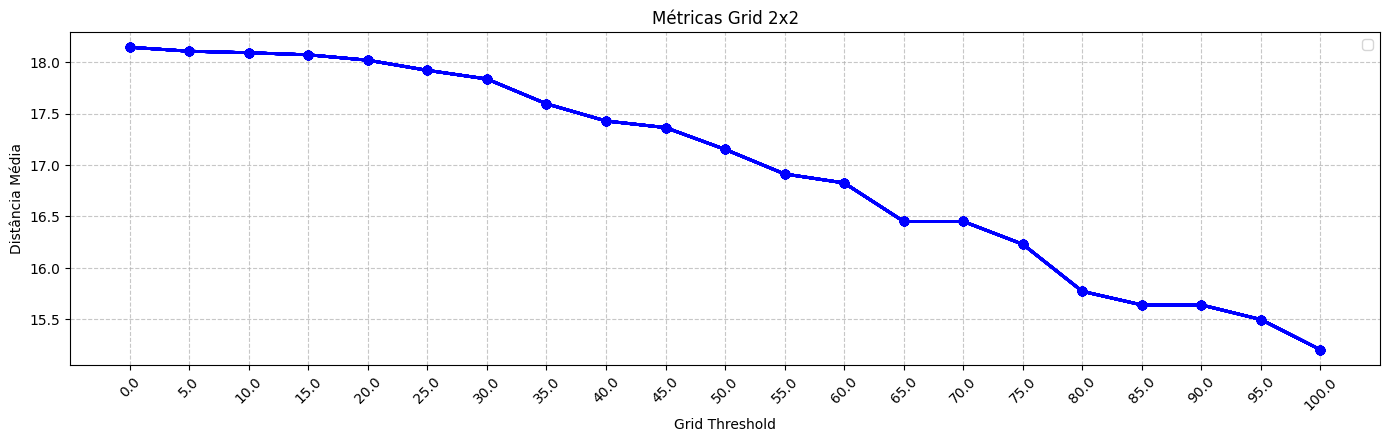

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Rótulos para o eixo x
#rotulos_x = ["2x2", "3x3", "4x4", "5x8", "6x10", "7x12", "9x14", "10x16", "11x18", "13x21"]

# Converter para arrays numpy
dados = np.array(dados)
indices = dados[0]  # Índices para posicionamento no gráfico

# Criar figura com dois subplots
plt.figure(figsize=(14, 8))

# Gráfico de Distâncias
plt.subplot(2, 1, 1)
for i in range(len(dados[0])):
    plt.plot(indices, dados_g, 'b-o', markersize=6, linewidth=2)
#plt.plot(indices, dados[:, 2], 'r-o', label='teste', markersize=6, linewidth=2)
plt.title('Métricas Grid 2x2')
plt.xlabel('Grid Threshold')
plt.ylabel('Distância Média')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(indices, indices, rotation=45)

plt.tight_layout()
plt.show()

In [5]:
shapes = [(6, 10), (13, 21)]
dados = []

#threshold = 5
for x in range(len(shapes)):
    file_path = f'calib_10xPonto/calib11/results/test_tResult_GridShape{shapes[x][0]}x{shapes[x][1]}.csv'
    opened = load_and_convert_csv(file_path)
    dados.append( np.mean(opened[1:, 0]) )
    #print(len(opened[1:, 0]))

print(dados[0])

45.21693722684217


C:\Users\luize\AppData\Local\Temp\ipykernel_1100\1715832491.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right')


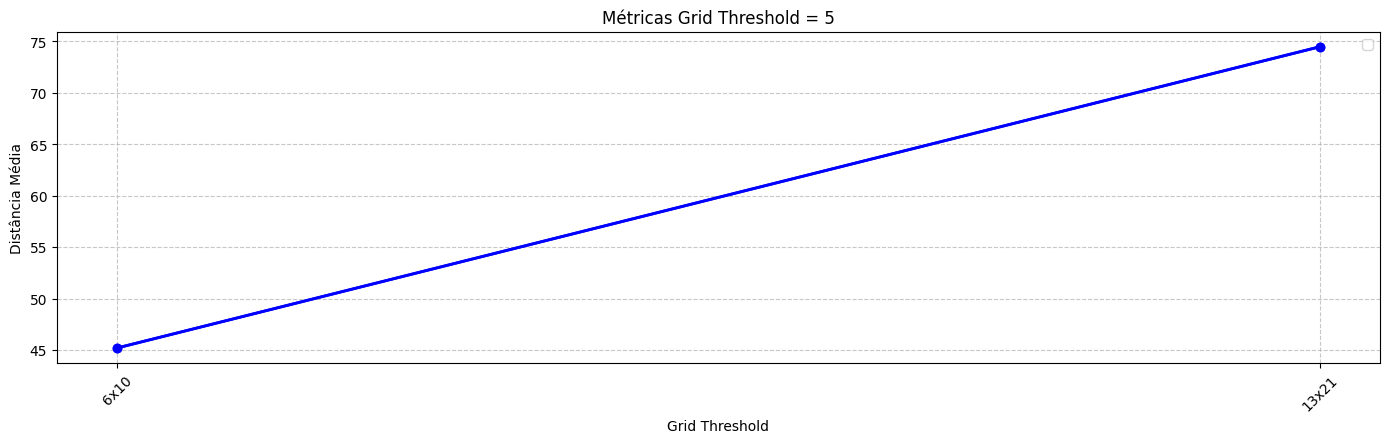

In [6]:
import matplotlib.pyplot as plt
import numpy as np

rotulos_x = ["6x10","13x21"]

# Converter para arrays numpy
dados = np.array(dados)
indices = np.arange(len(rotulos_x))  # Índices para posicionamento no gráfico

# Criar figura com dois subplots
plt.figure(figsize=(14, 8))

# Gráfico de Distâncias
plt.subplot(2, 1, 1)
for i in range(len(dados)):
    plt.plot(indices, dados, 'b-o', markersize=6, linewidth=2)
#plt.plot(indices, dados[:, 2], 'r-o', label='teste', markersize=6, linewidth=2)
plt.title('Métricas Grid Threshold = 5')
plt.xlabel('Grid Threshold')
plt.ylabel('Distância Média')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(indices, rotulos_x, rotation=45)

plt.tight_layout()
plt.show()

In [7]:
#shapes = [(2,2), (3,3), (4,4), (5, 8), (6, 10), (7, 12), (9, 14), (10, 16), (11, 18), (13, 21)]
shapes = [(6, 10), (13, 21)]
grid_threshold = [5, 50, 100]
rotulos_x = ["6x10", "13x21"]
dados_aux_dist = []
dados_aux_acc = []
dados_dist = []
dados_acc = []

#threshold = 5
for t in range(len(grid_threshold)):
    for x in range(len(shapes)):
        file_path = f'calib_10xPonto/calib11/results/test_tResult_GridShape{shapes[x][0]}x{shapes[x][1]}.csv'
        opened = load_and_convert_csv(file_path)
        dados_aux_dist.append( float(np.mean(opened[1:, t])) )
        dados_aux_acc.append(list(opened[1:, t]).count(0)/len(opened[1:, t]))

        #print(len(opened[1:, 0]))
    dados_dist.append(dados_aux_dist.copy())
    dados_acc.append(dados_aux_acc.copy())
    dados_aux_dist.clear()
    dados_aux_acc.clear()

print(dados_acc)

[[0.5589820359281437, 0.35607866507747316], [0.5796407185628742, 0.37589392133492255], [0.5901197604790419, 0.3879618593563766]]


In [11]:
print(dados)

[45.15743152 74.43582904]


ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

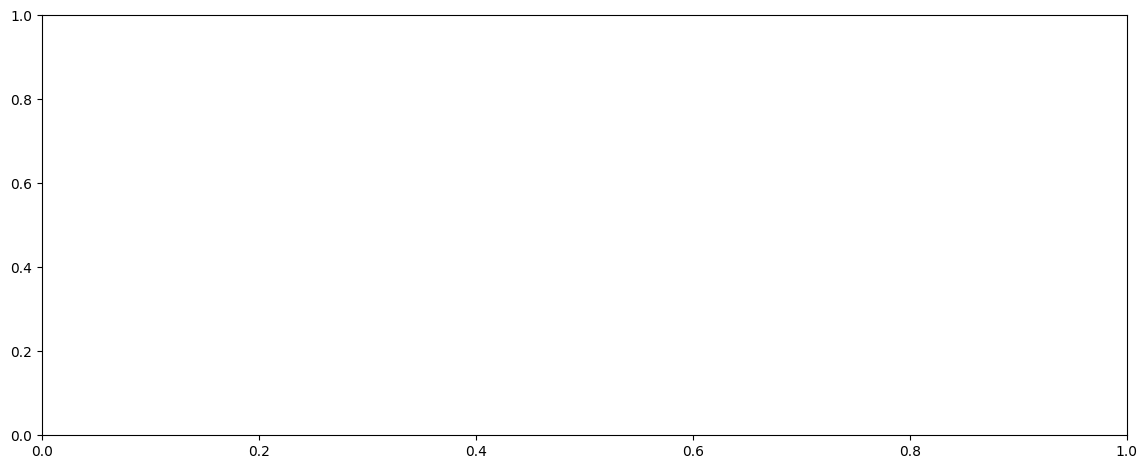

In [8]:
import matplotlib.pyplot as plt
import numpy as np
rotulos_x = ["6x10", "13x21"]
# Converter para arrays numpy
dados = np.array(dados)
indices = np.arange(len(rotulos_x))  # Índices para posicionamento no gráfico

# Lista de cores para cada linha (20 cores distintas)
cores = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 
         'tab:blue', 'tab:orange', 'tab:green',
         'tab:red', 'tab:purple', 'tab:brown', 'tab:pink',
         'tab:gray', 'tab:olive', 'tab:cyan', 
         'darkblue', 'lime', 'navy']

# Criar figura com dois subplots
plt.figure(figsize=(14, 12))

# Gráfico de Distâncias
plt.subplot(2, 1, 1)
for i in range(len(dados)):
    plt.plot(indices, dados[i], color=cores[i], marker='o', markersize=6, linewidth=2, label=f'Threshold = {grid_threshold[i]}')

plt.title('Distância Média com N Threshold em cada Grid')
plt.xlabel('Grid Threshold')
plt.ylabel('Distância Média')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))  # Ajuste da posição da legenda
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(indices, rotulos_x, rotation=45)

plt.tight_layout()
plt.show()

In [18]:
dados_acc

array([[0.57964072, 0.37589392],
       [0.59011976, 0.38796186],
       [0.60149701, 0.39973182]])

In [29]:
print(dados_acc)

[[0.57964072 0.37589392]
 [0.59011976 0.38796186]
 [0.60149701 0.39973182]]


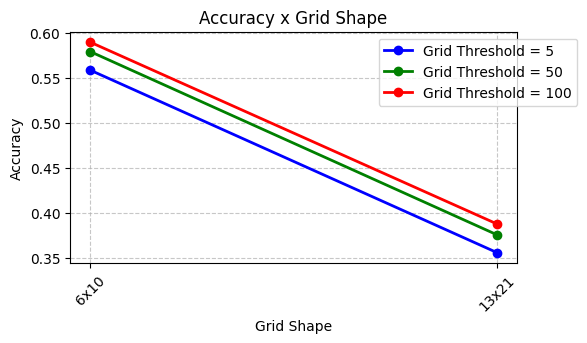

In [21]:
import matplotlib.pyplot as plt
import numpy as np

#rotulos_x = ["2x2", "3x3", "4x4", "5x8", "6x10", "7x12", "9x14", "10x16", "11x18", "13x21"]
rotulos_x = ["6x10", "13x21"]

# Converter para arrays numpy
dados_acc = np.array(dados_acc)
dados_dist = np.array(dados_dist)
indices = np.arange(len(rotulos_x))  # Índices para posicionamento no gráfico

# Lista de cores para cada linha (20 cores distintas)
cores_1 = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 
         'tab:blue', 'tab:orange', 'tab:green',
         'tab:red', 'tab:purple', 'tab:brown', 'tab:pink',
         'tab:gray', 'tab:olive', 'tab:cyan', 
         'darkblue', 'lime', 'navy']

cores_2 = [
    'm', 'lime',
    'tab:pink', 'tab:orange', 'g', 'tab:brown', 'darkblue',
    'c', 'k', 'r', 'b', 'tab:blue'
]

# Criar figura com dois subplots
plt.figure(figsize=(6, 6))

# Gráfico de Distâncias
plt.subplot(2, 1, 1)
for i in range(len(dados_acc)):
    plt.plot(indices, dados_acc[i], color=cores_1[i], marker='o', markersize=6, linewidth=2, label=f'Grid Threshold = {grid_threshold[i]}')

plt.title('Accuracy x Grid Shape')
plt.xlabel('Grid Shape')
plt.ylabel('Accuracy')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))  # Ajuste da posição da legenda
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(indices, rotulos_x, rotation=45)


plt.tight_layout()
plt.show()

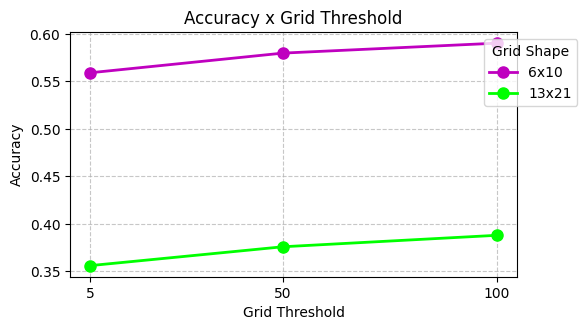

In [23]:
# Criar figura com dois subplots
plt.figure(figsize=(6, 6))

# Gráfico de Distâncias[]
plt.subplot(2, 1, 2)
for i in range(len(rotulos_x)):
    # Pegamos a coluna correspondente em dados_acc para este grid shape
    acc_values = dados_acc[:, i]
    plt.plot(grid_threshold, acc_values, 
             color=cores_2[i], 
             marker='o', 
             markersize=8, 
             linewidth=2, 
             label=rotulos_x[i])

plt.title('Accuracy x Grid Threshold')
plt.xlabel('Grid Threshold')
plt.ylabel('Accuracy')
plt.legend(title='Grid Shape', loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(grid_threshold)

plt.tight_layout()
plt.show()

In [33]:
print(rotulos_x)

['6x10', '13x21']


In [16]:
with open('calib_10xPonto/calib11/results/test_tResult.csv', 'w', newline='') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerows(threshold_result)

In [158]:
with open('calib_10xPonto/calib11/results/info_results.csv', 'w', newline='') as f:
    # using csv.writer method from CSV package
    write = csv.writer(f)
    write.writerows(to_save)

In [49]:
file_path = 'calib_10xPonto/calib11/results/info_results.csv'
dados = load_and_convert_csv(file_path)

print(dados)

[[ 15.7714162   90.41916168  18.14713636  83.98203593]
 [ 16.56988698  89.07185629  23.10026726  73.05389222]
 [ 35.0232706   78.14371257  42.09884711  59.43113772]
 [ 44.68419482  69.76047904  57.32187702  36.67664671]
 [ 74.37529265  53.59281437  85.41655839  26.34730539]
 [ 72.70084776  52.99401198  84.23936101  25.2994012 ]
 [ 80.40483255  46.70658683  93.87253848  17.66467066]
 [ 93.35212056  38.92215569 105.50509639  13.47305389]
 [105.66735481  34.57142857 116.65835034  10.57142857]
 [105.81110614  34.28143713 116.49981867  10.77844311]]


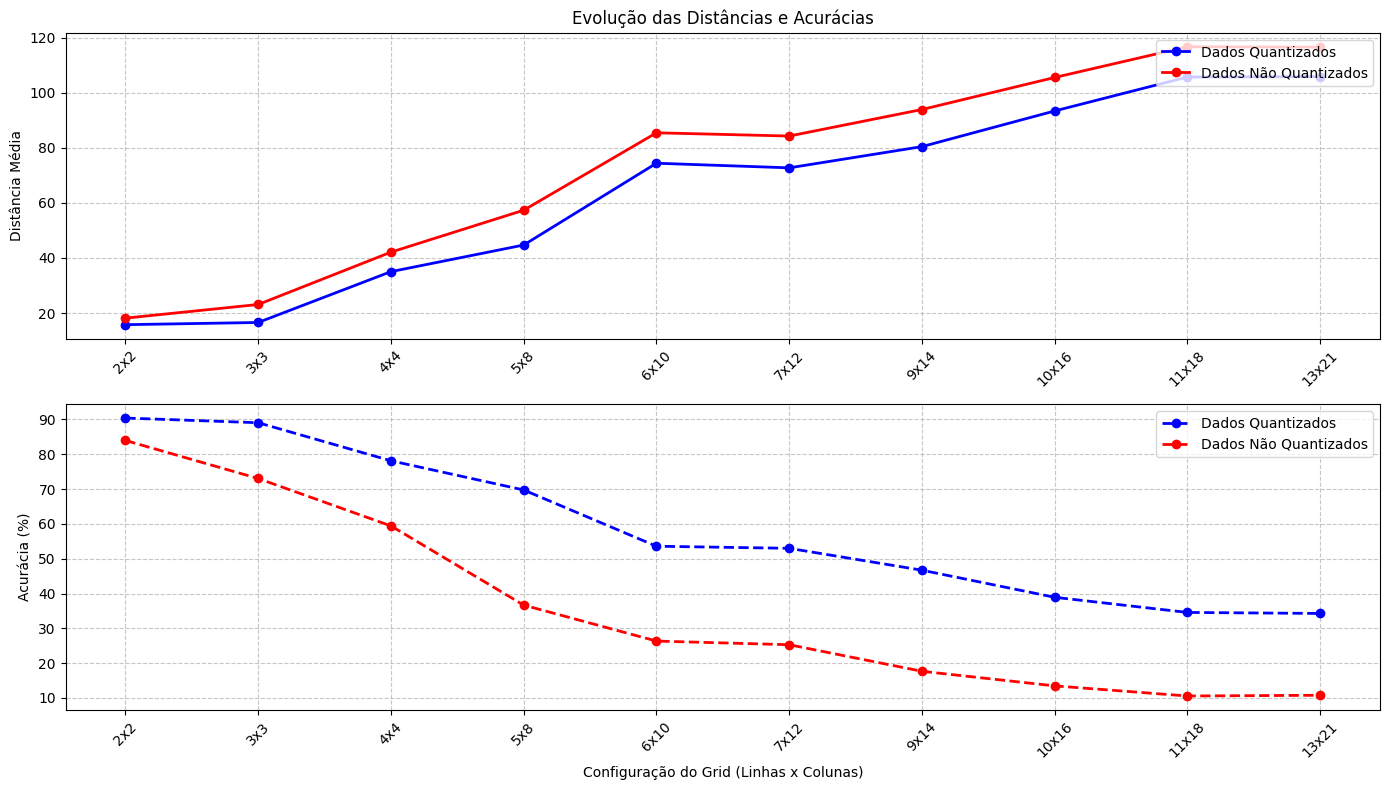

In [163]:
import matplotlib.pyplot as plt
import numpy as np

# Rótulos para o eixo x
rotulos_x = ["2x2", "3x3", "4x4", "5x8", "6x10", "7x12", "9x14", "10x16", "11x18", "13x21"]

# Converter para arrays numpy
dados = np.array(dados)
indices = np.arange(len(rotulos_x))  # Índices para posicionamento no gráfico

# Criar figura com dois subplots
plt.figure(figsize=(14, 8))

# Gráfico de Distâncias
plt.subplot(2, 1, 1)
plt.plot(indices, dados[:, 0], 'b-o', label='Dados Quantizados', markersize=6, linewidth=2)
plt.plot(indices, dados[:, 2], 'r-o', label='Dados Não Quantizados', markersize=6, linewidth=2)
plt.title('Evolução das Distâncias e Acurácias')
plt.ylabel('Distância Média')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(indices, rotulos_x, rotation=45)

# Gráfico de Acurácias
plt.subplot(2, 1, 2)
plt.plot(indices, dados[:, 1], 'b--o', label='Dados Quantizados', markersize=6, linewidth=2)
plt.plot(indices, dados[:, 3], 'r--o', label='Dados Não Quantizados', markersize=6, linewidth=2)
plt.xlabel('Configuração do Grid (Linhas x Colunas)')
plt.ylabel('Acurácia (%)')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(indices, rotulos_x, rotation=45)

plt.tight_layout()
plt.show()

In [10]:

memo_pos = []
for it in range(len(shapes)):
    indice = 0
    label = []
    predictions = []
    positions = []
    CELL_WIDTH = WIDTH // shapes[it][1]
    CELL_HEIGHT = HEIGHT // shapes[it][0]

    for s in shapes:
        width = WIDTH // s[1]
        height = HEIGHT // s[0]
        for x in range(s[0]): #linha
            for y in range(s[1]): #coluna
                positions.append(calcular_posicao_grid(x, y, width, height))
                
    for i in positions:
        for d in data:
            if pos_coletado[int(d[2])][0] >= i[0] - CELL_BORDER_X and pos_coletado[int(d[2])][0] <= i[0] + CELL_BORDER_X and pos_coletado[int(d[2])][1] >= i[1] - CELL_BORDER_Y and pos_coletado[int(d[2])][1] <= i[1] + CELL_BORDER_Y:
                #label[indice].append( (float(d[0]), float(d[1]), int(d[2])))~
                print("fds")
        indice+=1


    flag_out = []
    dist_pred_quant = []
    dist_pred_noQuant = []
    preds_noQuant = 0
    flag_aux = 0
    grid_threshold = 50
    preds_quant = 0

    for i in range(len(positions)):
        flag_out.append(0)

    #CONSIDERANDO QUANTIZAÇÃO
    for d in data:
        x_min = positions[int(d[2])][0] - CELL_WIDTH//2
        x_max = positions[int(d[2])][0] + CELL_WIDTH//2
        y_min = positions[int(d[2])][1] - CELL_HEIGHT//2
        y_max = positions[int(d[2])][1] + CELL_HEIGHT//2
        #print("XMIN, XMAX, YMIN, YMAX = ", x_min, x_max, y_min, y_max)   
        #print(d)
        if np.sum(flag_out) == 0:
            flag_out[int(d[2])] = 1
            flag_aux = int(d[2])

        if d[0] >= x_min and d[0] <= x_max and d[1] >= y_min and d[1] <= y_max or flag_out[flag_aux] == 1:
            if d[0] <= x_min - grid_threshold or d[0] >= x_max + grid_threshold or d[1] <= y_min - grid_threshold or d[1] >= y_max + grid_threshold:
                dist_pred_quant.append( (calcular_distancia_centro_para_borda(positions[int(d[2])][0], positions[int(d[2])][1], CELL_WIDTH, CELL_HEIGHT, d[0], d[1]), int(d[2])) )
                flag_out[flag_aux] = 0
                flag_aux = int(d[2])
                flag_out[int(d[2])] = 1
            else:
                dist_pred_quant.append( (0, int(d[2])) )
                preds_quant += 1

        else:
            dist_pred_quant.append(calcular_distancia_centro_para_borda(positions[int(d[2])][0], positions[int(d[2])][1], CELL_WIDTH, CELL_HEIGHT, d[0], d[1]))


    #SEM QUANTIZAÇÃO
    for d in data:
        x_min = positions[int(d[2])][0] - CELL_WIDTH//2
        x_max = positions[int(d[2])][0] + CELL_WIDTH//2
        y_min = positions[int(d[2])][1] - CELL_HEIGHT//2
        y_max = positions[int(d[2])][1] + CELL_HEIGHT//2
        #print("XMIN, XMAX, YMIN, YMAX = ", x_min, x_max, y_min, y_max)   
        #print(d)
        if d[0] >= x_min and d[0] <= x_max and d[1] >= y_min and d[1] <= y_max:
            dist_pred_noQuant.append( (0, int(d[2])) )
            preds_noQuant += 1
        else:
            dist_pred_noQuant.append( (calcular_distancia_centro_para_borda(positions[int(d[2])][0], positions[int(d[2])][1], CELL_WIDTH, CELL_HEIGHT, d[0], d[1]), int(d[2])) )

        #print("Distância: ", dist_pred[-1])
    #print("Distância média: ", dist_pred_noQuant)
    #print("TAMANHO DIST LIST: ", len(dist_pred_noQuant))
    print("Média distância predição quantizada: ", sum(a for a, _ in dist_pred_quant) / len(dist_pred_quant))
    print("Média distância predição não quantizada: ", sum(a for a, _ in dist_pred_noQuant) / len(dist_pred_noQuant))

    print("Predições quantizadas: ", preds_quant / len(dist_pred_quant) * 100, "%")
    print("Predições não quantizadas: ", preds_noQuant/ len(dist_pred_noQuant) * 100, "%")


fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds
fds


IndexError: list index out of range

In [ ]:
flag_out = []
dist_pred_quant = []
for i in range(len(positions)):
    flag_out.append(0)
print(flag_out)
flag_aux = 0

grid_threshold = 50
preds_quant = 0

#CONSIDERANDO QUANTIZAÇÃO
for d in data:
    x_min = positions[int(d[2])][0] - CELL_WIDTH//2
    x_max = positions[int(d[2])][0] + CELL_WIDTH//2
    y_min = positions[int(d[2])][1] - CELL_HEIGHT//2
    y_max = positions[int(d[2])][1] + CELL_HEIGHT//2
    #print("XMIN, XMAX, YMIN, YMAX = ", x_min, x_max, y_min, y_max)   
    #print(d)
    if np.sum(flag_out) == 0:
        flag_out[int(d[2])] = 1
        flag_aux = int(d[2])

    if d[0] >= x_min and d[0] <= x_max and d[1] >= y_min and d[1] <= y_max or flag_out[flag_aux] == 1:
        if d[0] <= x_min - grid_threshold or d[0] >= x_max + grid_threshold or d[1] <= y_min - grid_threshold or d[1] >= y_max + grid_threshold:
            dist_pred_quant.append( (calcular_distancia_centro_para_borda(positions[int(d[2])][0], positions[int(d[2])][1], CELL_WIDTH, CELL_HEIGHT, d[0], d[1]), int(d[2])) )
            flag_out[flag_aux] = 0
            flag_aux = int(d[2])
            flag_out[int(d[2])] = 1
        else:
            dist_pred_quant.append( (0, int(d[2])) )
            preds_quant += 1

    else:
        dist_pred_quant.append(calcular_distancia_centro_para_borda(positions[int(d[2])][0], positions[int(d[2])][1], CELL_WIDTH, CELL_HEIGHT, d[0], d[1]))


dist_pred_noQuant = []
preds_noQuant = 0
#SEM QUANTIZAÇÃO
for d in data:
    x_min = positions[int(d[2])][0] - CELL_WIDTH//2
    x_max = positions[int(d[2])][0] + CELL_WIDTH//2
    y_min = positions[int(d[2])][1] - CELL_HEIGHT//2
    y_max = positions[int(d[2])][1] + CELL_HEIGHT//2
    #print("XMIN, XMAX, YMIN, YMAX = ", x_min, x_max, y_min, y_max)   
    #print(d)
    if d[0] >= x_min and d[0] <= x_max and d[1] >= y_min and d[1] <= y_max:
        dist_pred_noQuant.append( (0, int(d[2])) )
        preds_noQuant += 1
    else:
        dist_pred_noQuant.append( (calcular_distancia_centro_para_borda(positions[int(d[2])][0], positions[int(d[2])][1], CELL_WIDTH, CELL_HEIGHT, d[0], d[1]), int(d[2])) )

    #print("Distância: ", dist_pred[-1])
#print("Distância média: ", dist_pred_noQuant)
#print("TAMANHO DIST LIST: ", len(dist_pred_noQuant))
print("Média distância predição quantizada: ", sum(a for a, _ in dist_pred_quant) / len(dist_pred_quant))
print("Média distância predição não quantizada: ", sum(a for a, _ in dist_pred_noQuant) / len(dist_pred_noQuant))

print("Predições quantizadas: ", preds_quant / len(dist_pred_quant) * 100, "%")
print("Predições não quantizadas: ", preds_noQuant/ len(dist_pred_noQuant) * 100, "%")

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Média distância predição quantizada:  466.586829961384
Média distância predição não quantizada:  467.68482806839626
Predições quantizadas:  15.577889447236181 %
Predições não quantizadas:  12.060301507537687 %


In [25]:
# Processamento dos dados
media_total = 0
grupos = {}
for linha in dist_pred_noQuant:
    valor_grupo = linha[1]
    if valor_grupo not in grupos:
        grupos[valor_grupo] = []
    grupos[valor_grupo].append(linha[0])

# Impressão formatada
for grupo in sorted(grupos.keys()):
    if grupo > 71:  # Considerando que só queremos até 49
        continue
    print(f"\nGrupo {grupo}:")
    for col1 in grupos[grupo]:
        print(f"{col1}")

    print(f"Média do grupo {grupo}: {np.mean(grupos[grupo])}")
    media_total += np.mean(grupos[grupo])
print(media_total/len(grupos.keys()))


Grupo 0:
0
61.53727827611095
0
76.13367837920782
42.410004079807436
76.89225479522719
25.672579061292026
14.039262588205872
0
Média do grupo 0: 32.96500635331681

Grupo 1:
0
0
33.479566228009844
44.217378836922876
17.3940080808311
0
11.259032637696123
0
Média do grupo 1: 13.293748222932493

Grupo 2:
56.20184094526555
98.32671606414715
120.80822917056221
38.178493815025604
71.15040352962943
78.7903886132267
79.53562170461426
79.96468763040548
Média do grupo 2: 77.86954768410955

Grupo 3:
76.55003283775832
72.18760062026283
24.356920850567448
52.62029788374531
58.09974380888082
60.78274289435285
71.39711023711257
38.548637099438224
Média do grupo 3: 56.8178857790148

Grupo 4:
94.25364219850704
96.66415509285048
80.15018548131636
86.25446724621858
86.47353761347463
69.30593362776901
96.74638624327613
94.08677862044306
Média do grupo 4: 87.99188576548191

Grupo 5:
79.31767526728534
77.13386571349807
63.40768995990236
57.343108684743726
57.46203175683098
17.138979730023607
69.3242586713159

In [112]:
# Processamento dos dados
grupos = {}
for linha in dist_pred_quant:
    valor_grupo = linha[1]
    if valor_grupo not in grupos:
        grupos[valor_grupo] = []
    grupos[valor_grupo].append(linha[0])

# Impressão formatada
for grupo in sorted(grupos.keys()):
    if grupo > 49:  # Considerando que só queremos até 49
        continue
    print(f"\nGrupo {grupo}:")
    for col1 in grupos[grupo]:
        print(f"{col1}")


Grupo 0:
0
0
0
0
0
0
0
0
0

Grupo 1:
0
0
0
0
0
0
0
0

Grupo 2:
0
98.32671606414715
120.80822917056221
0
0
0
0
0

Grupo 3:
0
0
0
0
0
0
0
0

Grupo 4:
94.25364219850704
96.66415509285048
80.15018548131636
86.25446724621858
86.47353761347463
0
96.74638624327613
94.08677862044306

Grupo 5:
0
0
0
0
0
0
0
0

Grupo 6:
95.4192395390929
130.32543097217408
109.2480759951749
126.73094382710185
136.50575797905117
102.91057574213558
106.0373137552679
137.28250661394156

Grupo 7:
0
0
0
0
0
0
0
0

Grupo 8:
92.1971266221741
0
0
81.97527574688411
0
0
0
0

Grupo 9:
118.06337018551321
0
0
0
96.0597739664319
0
0
103.6632225703947

Grupo 10:
108.12544519947141
0
0
0
0
0
0
0

Grupo 11:
0
0
0
0
0
0
0
0

Grupo 12:
0
0
0
0
0
0
0
0

Grupo 13:
0
0
0
0
0
0
0
0

Grupo 14:
0
0
0
0
0
0
0

Grupo 15:
0
0
0
0
0
0
0
0

Grupo 16:
0
0
0
0
0
0
0
0

Grupo 17:
0
0
0
0
0
0
0
0

Grupo 18:
146.54775826672883
131.33121584561778
126.83629440923389
173.16457283618263
207.3603815997306
175.521155295919
181.4611260194658
180.4698514